In [66]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import h5py
import itertools as IT
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
from matplotlib.patches import ConnectionPatch
from matplotlib.pyplot import cm
from statistics import mean
import pandas as pd
import statistics
import math

In [67]:
f = h5py.File('working_/rec/herdingspikes/HS2_sorted.hdf5','r') 

In [68]:
spike_time = f['times'][()]   
sf = 30000  
maxt = max(spike_time)/sf  

In [69]:
spike_loc = f['data'][()]
section_len = max(spike_loc[1])/3
print(max(spike_loc[1]))
print(len(spike_loc[1]))

2853.087
973012


# Clustering

Number of clusters for time interval 0: 71
Number of reliable clusters for time interval 0: 56
Number of clusters for time interval 1: 73
Number of reliable clusters for time interval 1: 67
Number of clusters for time interval 2: 68
Number of reliable clusters for time interval 2: 57
Number of clusters for time interval 3: 87
Number of reliable clusters for time interval 3: 76
Number of clusters for time interval 4: 81
Number of reliable clusters for time interval 4: 70
Number of clusters for time interval 5: 81
Number of reliable clusters for time interval 5: 75
Number of clusters for time interval 6: 78
Number of reliable clusters for time interval 6: 68
Number of clusters for time interval 7: 81
Number of reliable clusters for time interval 7: 70
Number of clusters for time interval 8: 79
Number of reliable clusters for time interval 8: 67
Number of clusters for time interval 9: 77
Number of reliable clusters for time interval 9: 65
Number of clusters for time interval 10: 87
Number

Number of clusters for time interval 85: 62
Number of reliable clusters for time interval 85: 58
Number of clusters for time interval 86: 66
Number of reliable clusters for time interval 86: 59
Number of clusters for time interval 87: 71
Number of reliable clusters for time interval 87: 68
Number of clusters for time interval 88: 59
Number of reliable clusters for time interval 88: 54
Number of clusters for time interval 89: 64
Number of reliable clusters for time interval 89: 58
Number of clusters for time interval 90: 69
Number of reliable clusters for time interval 90: 62
Number of clusters for time interval 91: 72
Number of reliable clusters for time interval 91: 60
Number of clusters for time interval 92: 57
Number of reliable clusters for time interval 92: 53
Number of clusters for time interval 93: 64
Number of reliable clusters for time interval 93: 57
Number of clusters for time interval 94: 64
Number of reliable clusters for time interval 94: 59
Number of clusters for time in

([<matplotlib.axis.XTick at 0x7f50543d66a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

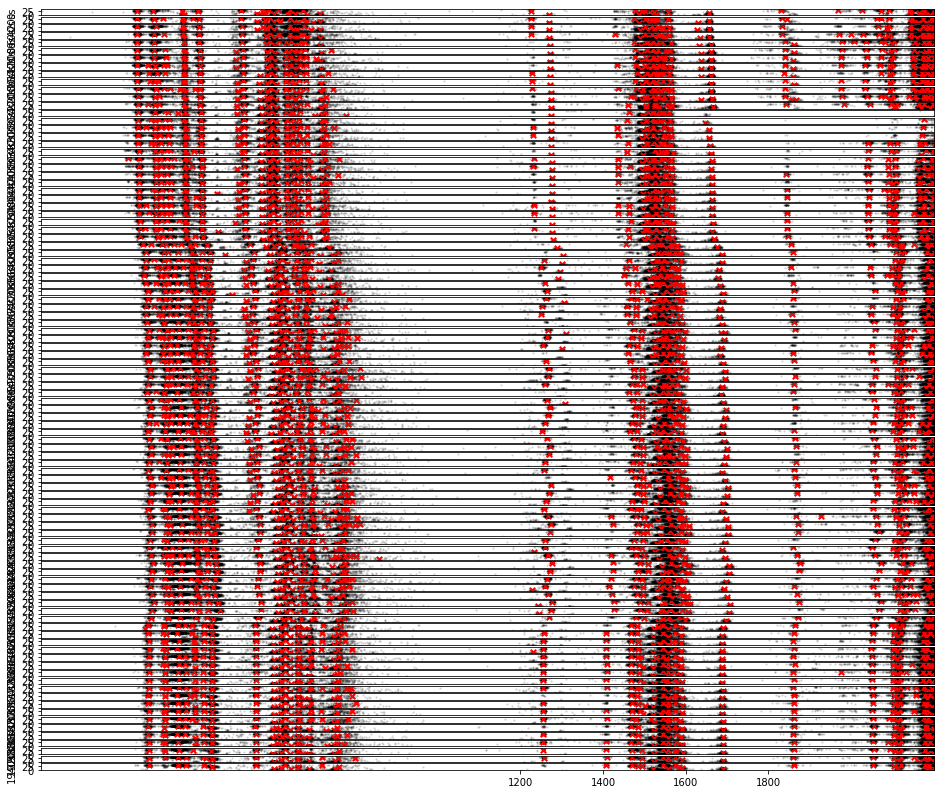

In [53]:
plt.figure(figsize=(16,14))
ms = MeanShift(bandwidth=6.5, bin_seeding=True, min_bin_freq=6)

cluster_centers_tf_wp= []
time_frames_wp = []
dt = 20
steps = np.arange(0,int(maxt),dt)
for j,i in enumerate(steps):
    t0=i*sf      #i*30k for every step
    t1=(i+dt)*sf  #take value of the next time step
    count = 0
    inds = np.where ((spike_time>=t0) & (spike_time<t1))[0]# & (spike_loc[1]<1800) & (spike_loc[1]>1200)
    X_clust = np.vstack((spike_loc[0,inds], spike_loc[1,inds]))
    #clustering
    ms.fit(X_clust.T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    cc = []
    n_clusters = len(np.unique(labels))
    for k in range(len(np.unique(labels,return_counts=True)[1])):
        if np.unique(labels,return_counts=True)[1][k] > 30:
            cc.append(cluster_centers[k])
            count +=1
    print('Number of clusters for time interval %d: %d' %(j, n_clusters))
    print('Number of reliable clusters for time interval %d: %d' %(j, count))
    cc = np.array(cc)
    cluster_centers_tf_wp.append(cc)
    time_frames_wp.append(j)
    if i%10==0:     #for each time stamp
        ax = plt.subplot(len(steps),1,j+1)     #nrows, nrcols, plot_no
        y = X_clust[0][:]
        x = X_clust[1][:]
        
        ax.scatter(x,y, s=2, alpha=0.1, c='k')
        #ax.scatter(cluster_centers[:,1], cluster_centers[:,0], marker="x", color='r', s=30, linewidths=2)
        ax.scatter(cc[:,1], cc[:,0], marker="x", color='r', s=30, linewidths=2)
        
        plt.ylabel('{:d}s'.format(int(t0/sf)))
        plt.ylabel('{:d}s'.format(int(t0/sf)))
    
        plt.xlim((40,2200))        #Get or set the x limits of the current axes
        plt.ylim((0,40))
        plt.xticks(())
plt.xticks((1200,1400,1600,1800))   

In [70]:
def clustering(y1,y2):
    plt.figure(figsize=(16,14))
    ms = MeanShift(bandwidth=6.5, bin_seeding=True, min_bin_freq=6)

    cluster_centers_tf= []
    time_frames = []
    dt = 20
    steps = np.arange(0,int(maxt),dt)
    for j,i in enumerate(steps):
        t0=i*sf      #i*30k for every step
        t1=(i+dt)*sf  #take value of the next time step

        inds = np.where ((spike_time>=t0) & (spike_time<t1) & (spike_loc[1]<=y2) & (spike_loc[1]>y1))[0]
        X_clust = np.vstack((spike_loc[0,inds], spike_loc[1,inds]))
        if len(X_clust[1]) >6:
            #clustering
            ms.fit(X_clust.T)
            labels = ms.labels_
            cluster_centers = ms.cluster_centers_
            n_clusters = len(np.unique(labels))
            print('Number of clusters for time interval %d: %d' %(j, n_clusters))
            cluster_centers_tf.append(cluster_centers)
            time_frames.append(j)
            if i%10==0:     #for each time stamp
                ax = plt.subplot(len(steps),1,j+1)     #nrows, nrcols, plot_no
                y = X_clust[0][:]
                x = X_clust[1][:]

                ax.scatter(x,y, s=2, alpha=0.1, c='k')
                ax.scatter(cluster_centers[:,1], cluster_centers[:,0], marker="x", color='r', s=30, linewidths=2)
                plt.ylabel('{:d}s'.format(int(t0/sf)))

                #plt.xlim((40,350))        #Get or set the x limits of the current axes
                plt.ylim((0,40))
                plt.xticks(())
    return cluster_centers_tf,time_frames

Number of clusters for time interval 0: 21
Number of clusters for time interval 1: 20
Number of clusters for time interval 2: 19
Number of clusters for time interval 3: 20
Number of clusters for time interval 4: 20
Number of clusters for time interval 5: 24
Number of clusters for time interval 6: 20
Number of clusters for time interval 7: 21
Number of clusters for time interval 8: 25
Number of clusters for time interval 9: 24
Number of clusters for time interval 10: 26
Number of clusters for time interval 11: 24
Number of clusters for time interval 12: 20
Number of clusters for time interval 13: 25
Number of clusters for time interval 14: 27
Number of clusters for time interval 15: 27
Number of clusters for time interval 16: 27
Number of clusters for time interval 17: 26
Number of clusters for time interval 18: 29
Number of clusters for time interval 19: 27
Number of clusters for time interval 20: 26
Number of clusters for time interval 21: 24
Number of clusters for time interval 22: 2

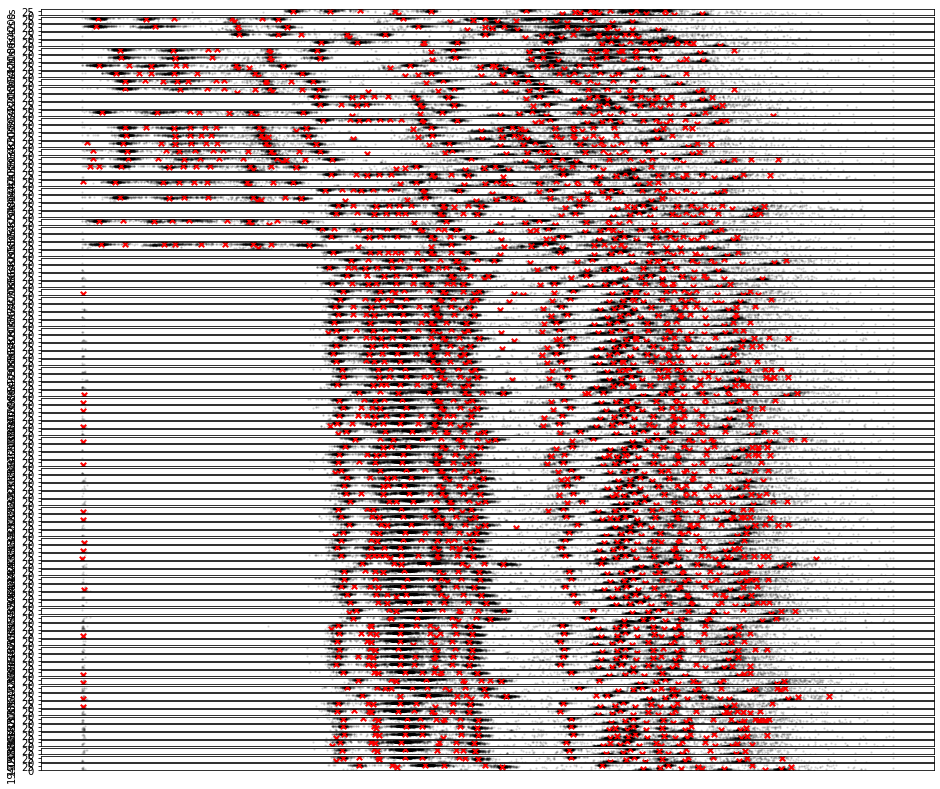

In [71]:
cluster_centers_tf_section1, time_frames_section1 = clustering(0,section_len)

Number of clusters for time interval 0: 17
Number of clusters for time interval 1: 19
Number of clusters for time interval 2: 16
Number of clusters for time interval 3: 14
Number of clusters for time interval 4: 15
Number of clusters for time interval 5: 15
Number of clusters for time interval 6: 20
Number of clusters for time interval 7: 18
Number of clusters for time interval 8: 16
Number of clusters for time interval 9: 16
Number of clusters for time interval 10: 20
Number of clusters for time interval 11: 19
Number of clusters for time interval 12: 17
Number of clusters for time interval 13: 12
Number of clusters for time interval 14: 12
Number of clusters for time interval 15: 15
Number of clusters for time interval 16: 13
Number of clusters for time interval 17: 13
Number of clusters for time interval 18: 11
Number of clusters for time interval 19: 16
Number of clusters for time interval 20: 13
Number of clusters for time interval 21: 15
Number of clusters for time interval 22: 1

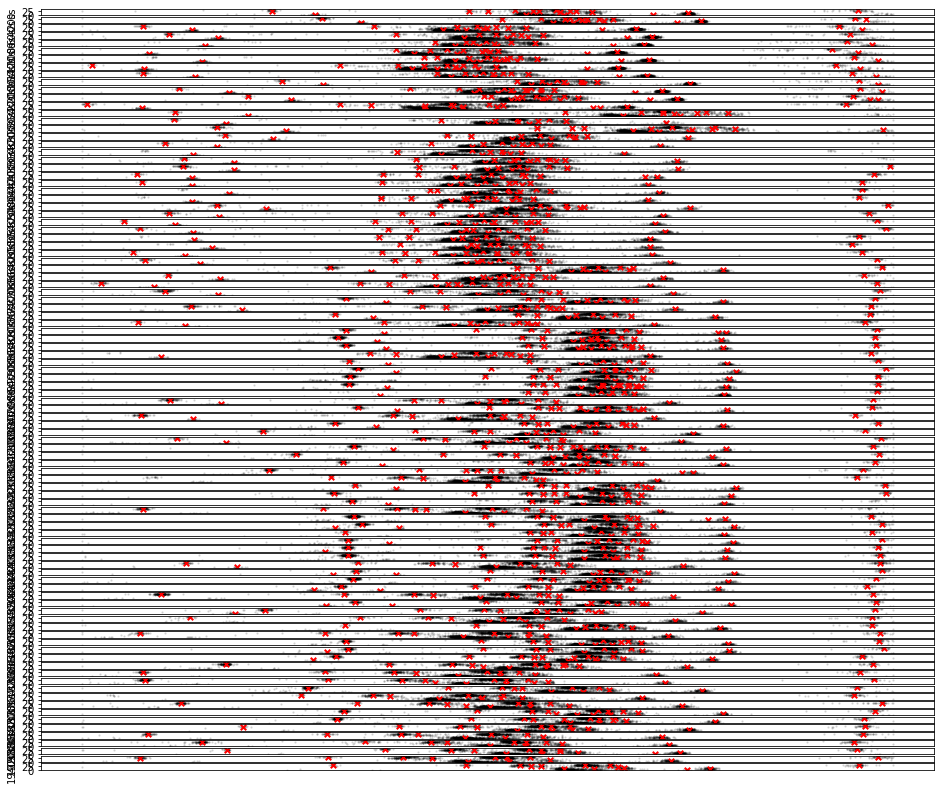

In [72]:
cluster_centers_tf_section2, time_frames_section2 = clustering(section_len, 2*section_len)

Number of clusters for time interval 0: 33
Number of clusters for time interval 1: 34
Number of clusters for time interval 2: 33
Number of clusters for time interval 3: 53
Number of clusters for time interval 4: 46
Number of clusters for time interval 5: 42
Number of clusters for time interval 6: 38
Number of clusters for time interval 7: 42
Number of clusters for time interval 8: 38
Number of clusters for time interval 9: 37
Number of clusters for time interval 10: 41
Number of clusters for time interval 11: 42
Number of clusters for time interval 12: 28
Number of clusters for time interval 14: 2
Number of clusters for time interval 15: 2
Number of clusters for time interval 16: 8
Number of clusters for time interval 17: 16
Number of clusters for time interval 18: 16
Number of clusters for time interval 19: 17
Number of clusters for time interval 20: 20
Number of clusters for time interval 21: 18
Number of clusters for time interval 22: 23
Number of clusters for time interval 23: 24
N

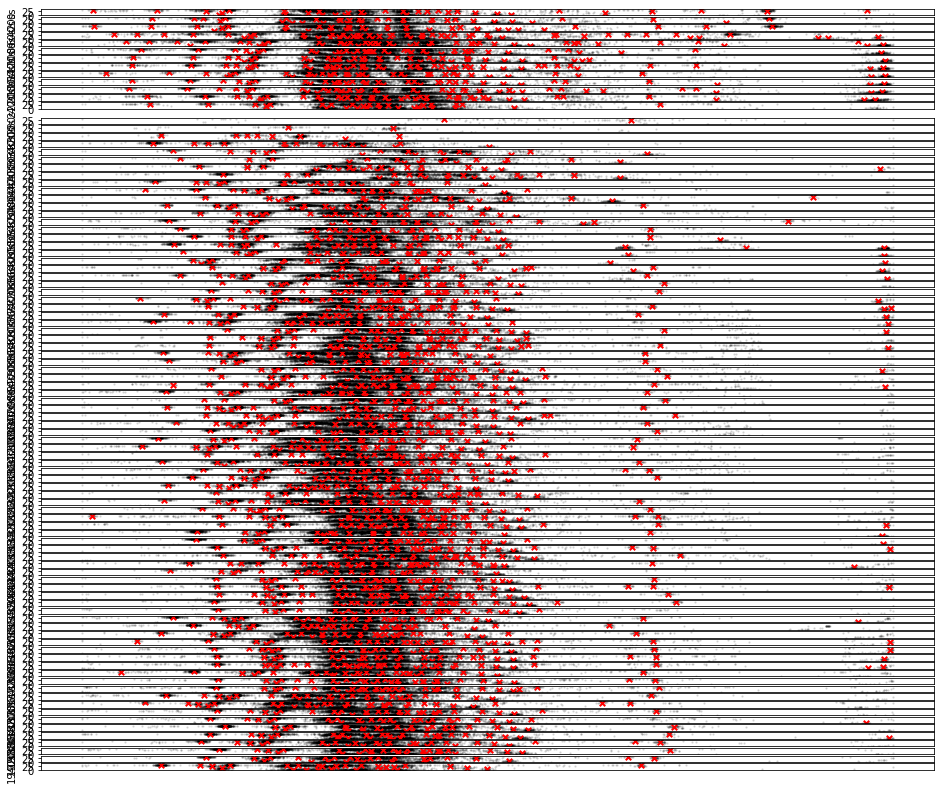

In [73]:
cluster_centers_tf_section3, time_frames_section3 = clustering(2*section_len, 3*section_len)

# Matching algorithm

In [32]:
def matching(cluster_centers_tf, time_frames):
    tf_dict = {}
    tf_dict_dif = {}
    ll_drifts=[]
    #dict_cluster_positions={}
    cluster_positions={}
    for t in range(len(time_frames)-1):

        #construct the distance matrix for every two consecutive clusters
        dist_matrix = np.zeros((len(cluster_centers_tf[t]), len(cluster_centers_tf[t+1])))
        for k,i in enumerate(cluster_centers_tf[t]):
            for l,j in enumerate(cluster_centers_tf[t+1]):
                dist_matrix[k][l] = distance.euclidean(i,j)

        #transform the matrix to a np array
        npdist_matrix = np.array(dist_matrix)
        list_of_indices = []
        dict_of_drifts = {}
        list_of_drifts = []
        cluster_position = {}
        while np.min(npdist_matrix)<100:

            #index of the minimum element of the matrix
            min_dist = np.argmin(npdist_matrix)
            #indexes of the corresponding clusters
            x,y = np.unravel_index(min_dist, np.array(npdist_matrix).shape)
            list_of_indices.append((x,y))
            #list_of_drifts.append(cluster_centers_tf[t][x] - cluster_centers_tf[t+1][y])
            list_of_drifts.append(cluster_centers_tf[t+1][y] - cluster_centers_tf[t][x])
            #dict_of_drifts[(x,y)] = cluster_centers_tf[t][x] - cluster_centers_tf[t+1][y]
            dict_of_drifts[(x,y)] = cluster_centers_tf[t+1][y] - cluster_centers_tf[t][x]
            #cluster_position[(x,y)]= ((cluster_centers_tf[t][x], cluster_centers_tf[t+1][y]))
            cluster_position[(x,y)]= ((cluster_centers_tf[t+1][y], cluster_centers_tf[t][x]))
            npdist_matrix[x,:] = 1e6
            npdist_matrix[:,y] = 1e6

        tf_dict[(t,t+1)] = list_of_indices
        tf_dict_dif[(t,t+1)] = dict_of_drifts
        cluster_positions[(t,t+1)] = cluster_position
        ll_drifts.append(list_of_drifts)
    return tf_dict_dif, ll_drifts

In [74]:
tf_dict_dif_section1, ll_drift_section1 = matching(cluster_centers_tf_section1, time_frames_section1)
tf_dict_dif_section2, ll_drift_section2 = matching(cluster_centers_tf_section2, time_frames_section2)
tf_dict_dif_section3, ll_drift_section3 = matching(cluster_centers_tf_section3, time_frames_section3)

In [94]:
tf_dict_dif_x, ll_drift_section_x = matching(cluster_centers_tf, time_frames)

In [61]:
tf_dict_dif_wp, ll_drift_wp = matching(cluster_centers_tf_wp, time_frames_wp) #whole probe

# Average Disp

In [75]:
def avg_disp(tf_dict_dif, time_frames):
    dict_avg_disp = {}
    dict_std = {}
    for t in range(len(time_frames)-1):
        distances = []
        for x,y in tf_dict_dif[t,t+1]:
            distances.append(tf_dict_dif[t,t+1][x,y])
        npdistances=np.array(distances)
        dict_avg_disp[t,t+1] = npdistances.mean(axis=0)
        dict_std[t,t+1] = np.std(npdistances,axis=0) 
    return dict_avg_disp, dict_std

In [76]:
dict_avg_disp_section1 = {}
dict_std_section1 = {}
dict_avg_disp_section1, dict_std_section1 = avg_disp(tf_dict_dif_section1, time_frames_section1)

In [77]:
dict_avg_disp_section2 = {}
dict_std_section2 = {}
dict_avg_disp_section2, dict_std_section2 = avg_disp(tf_dict_dif_section2, time_frames_section2)

In [78]:
dict_avg_disp_section3 = {}
dict_std_section3 = {}
dict_avg_disp_section3, dict_std_section3 = avg_disp(tf_dict_dif_section3, time_frames_section3)

In [95]:
dict_avg_disp = {}
dict_std = {}
dict_avg_disp, dict_std = avg_disp(tf_dict_dif_x, time_frames)

In [62]:
dict_avg_disp_wp = {}
dict_std_wp = {}
dict_avg_disp_wp, dict_std_wp = avg_disp(tf_dict_dif_wp, time_frames_wp)

Text(0, 0.5, 'Avg Displacement')

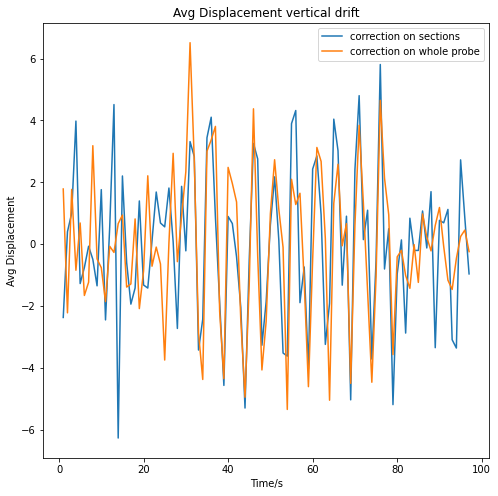

In [137]:
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames)[1:], [dict_avg_disp[t,t+1][1] for t in range(len(time_frames)-1)])   #horizontal drift
plt.plot(np.array(time_frames_wp)[1:], [dict_avg_disp_wp[t,t+1][1] for t in range(len(time_frames_wp)-1)])   #vertical drift
plt.legend(['correction on sections', 'correction on whole probe'], loc = "upper right")
plt.title('Avg Displacement vertical drift')
plt.xlabel('Time/s')
plt.ylabel('Avg Displacement')
#plt.ylim((-2.5, 2.0))

Text(0, 0.5, 'Avg Displacement')

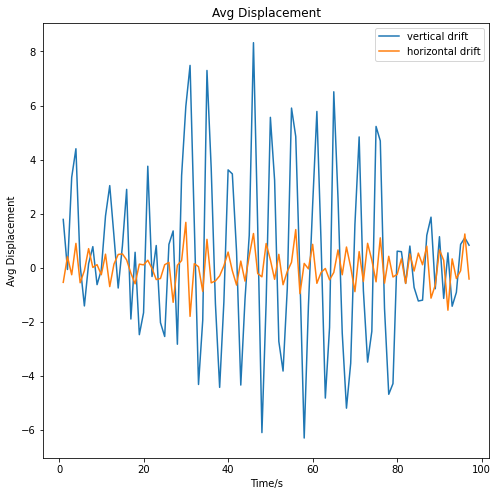

In [91]:
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames_wp)[1:], [dict_avg_disp_wp[t,t+1][1] for t in range(len(time_frames_wp)-1)])   #horizontal drift
plt.plot(np.array(time_frames_wp)[1:], [dict_avg_disp_wp[t,t+1][0] for t in range(len(time_frames_wp)-1)])   #vertical drift
plt.legend(['vertical drift', 'horizontal drift'], loc = "upper right")
plt.title('Avg Displacement')
plt.xlabel('Time/s')
plt.ylabel('Avg Displacement')
#plt.ylim((-2.5, 2.0))

Text(0, 0.5, 'Avg Displacement')

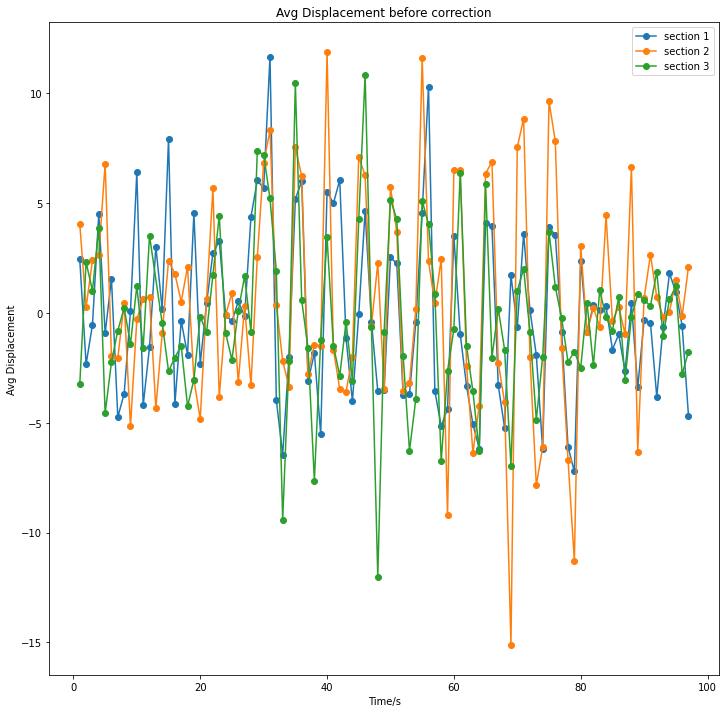

In [43]:
plt.figure(figsize=(12,12))
plt.plot(np.array(time_frames_section1)[1:], [dict_avg_disp_section1[t,t+1][1] for t in range(len(time_frames_section1)-1)],'o-')  
plt.plot(np.array(time_frames_section2)[1:], [dict_avg_disp_section2[t,t+1][1] for t in range(len(time_frames_section2)-1)],'o-')
plt.plot(np.array(time_frames_section3)[1:], [dict_avg_disp_section3[t,t+1][1] for t in range(len(time_frames_section3)-1)],'o-')  
plt.legend(['section 1', 'section 2', 'section 3'], loc = "upper right")
plt.title('Avg Displacement before correction')
plt.xlabel('Time/s')
plt.ylabel('Avg Displacement')
#plt.ylim((-2.5, 2.0))

# Clean Data

In [56]:
def clean_data_wp(tf_dict_dif, time_frames, dict_avg_disp, dict_std):
    cleaned_data = {}
    ll_of_disp=[]
    for t in range(len(time_frames)-1):
        cleaned_data_dict={}
        list_of_disp = []
        for x,y in tf_dict_dif[t,t+1]:
            y_threshold = (dict_avg_disp[t,t+1][0] - dict_std[t,t+1][0], dict_avg_disp[t,t+1][0] + dict_std[t,t+1][0])
            x_threshold = (dict_avg_disp[t,t+1][1] - dict_std[t,t+1][1], dict_avg_disp[t,t+1][1] + dict_std[t,t+1][1])
            if tf_dict_dif[t,t+1][x,y][0] > y_threshold[0] and tf_dict_dif[t,t+1][x,y][0] < y_threshold[1] and tf_dict_dif[t,t+1][x,y][1] > x_threshold[0] and tf_dict_dif[t,t+1][x,y][1] < x_threshold[1]:
                cleaned_data_dict[x,y] = tf_dict_dif[t,t+1][x,y]
                list_of_disp.append(tf_dict_dif[t,t+1][x,y])
        cleaned_data[(t,t+1)] = cleaned_data_dict
        ll_of_disp.append(list_of_disp)
    return cleaned_data, ll_of_disp

In [79]:
def clean_data(tf_dict_dif, time_frames, dict_avg_disp, dict_std):
    cleaned_data = {}
    ll_of_disp=[]
    for t in range(len(time_frames)-1):
        cleaned_data_dict={}
        list_of_disp = []
        for x,y in tf_dict_dif[t,t+1]:
            y_threshold = (dict_avg_disp[t,t+1][0] - dict_std[t,t+1][0], dict_avg_disp[t,t+1][0] + dict_std[t,t+1][0])
            x_threshold = (dict_avg_disp[t,t+1][1] - dict_std[t,t+1][1], dict_avg_disp[t,t+1][1] + dict_std[t,t+1][1])
            if tf_dict_dif[t,t+1][x,y][0] > y_threshold[0] and tf_dict_dif[t,t+1][x,y][0] < y_threshold[1] and tf_dict_dif[t,t+1][x,y][1] > x_threshold[0] and tf_dict_dif[t,t+1][x,y][1] < x_threshold[1]:
                cleaned_data_dict[x,y] = tf_dict_dif[t,t+1][x,y]
                list_of_disp.append(tf_dict_dif[t,t+1][x,y])
            elif len(tf_dict_dif[t,t+1]) <= 2:
                cleaned_data_dict[x,y] = tf_dict_dif[t,t+1][x,y]
                list_of_disp.append(tf_dict_dif[t,t+1][x,y])
        cleaned_data[(t,t+1)] = cleaned_data_dict
        ll_of_disp.append(list_of_disp)
    return cleaned_data, ll_of_disp

In [80]:
cleaned_data_section1, ll_of_disp_section1 = clean_data(tf_dict_dif_section1, time_frames_section1, dict_avg_disp_section1, dict_std_section1)
cleaned_data_section2, ll_of_disp_section2 = clean_data(tf_dict_dif_section2, time_frames_section2, dict_avg_disp_section2, dict_std_section2)
cleaned_data_section3, ll_of_disp_section3 = clean_data(tf_dict_dif_section3, time_frames_section3, dict_avg_disp_section3, dict_std_section3)

In [96]:
cleaned_data, ll_of_disp = clean_data_wp(tf_dict_dif_x, time_frames, dict_avg_disp, dict_std)

In [63]:
cleaned_data_wp, ll_of_disp_wp = clean_data_wp(tf_dict_dif_wp, time_frames_wp, dict_avg_disp_wp, dict_std_wp)

In [37]:
cleaned_data_before_correction = cleaned_data_wp

In [18]:
def clean_avg(cleaned_data, time_frames):
    cleaned_avg_disp = {}
    cleaned_std = {}
    for t in range(len(time_frames)-1):
        dist = []
        for x,y in cleaned_data[t,t+1]:
            dist.append(cleaned_data[t,t+1][x,y])
        npdist=np.array(dist)
        cleaned_avg_disp[t,t+1] = npdist.mean(axis=0)
        cleaned_std[t,t+1] = np.std(npdist,axis=0)
    return cleaned_avg_disp

In [118]:
cleaned_avg_disp_section1 = {}
cleaned_avg_disp_section1 = clean_avg(cleaned_data_section1, time_frames_section1)
cleaned_avg_disp_section2 = {}
cleaned_avg_disp_section2 = clean_avg(cleaned_data_section2, time_frames_section2)
cleaned_avg_disp_section3 = {}
cleaned_avg_disp_section3 = clean_avg(cleaned_data_section3, time_frames_section3)

In [140]:
cleaned_avg_disp = clean_avg(cleaned_data, time_frames)

In [19]:
cleaned_avg_disp_wp = clean_avg(cleaned_data_wp, time_frames_wp)

In [97]:
cleaned_avg_disp_before_correction = cleaned_avg_disp_wp

Text(0, 0.5, 'Avg Displacement')

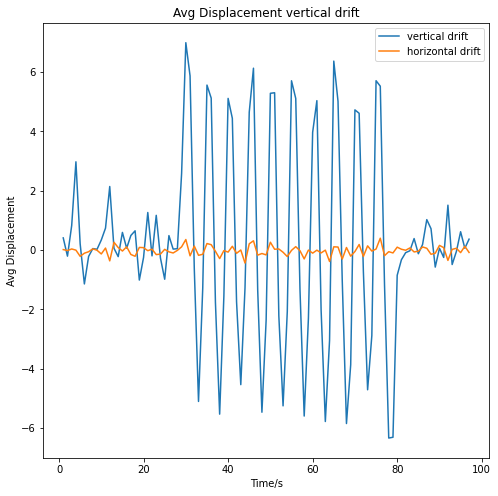

In [98]:
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames_wp)[1:], [cleaned_avg_disp_wp[t,t+1][1] for t in range(len(time_frames_wp)-1)])   #horizontal drift
plt.plot(np.array(time_frames_wp)[1:], [cleaned_avg_disp_wp[t,t+1][0] for t in range(len(time_frames_wp)-1)])   #vertical drift
plt.legend(['vertical drift', 'horizontal drift'], loc = "upper right")
plt.title('Avg Displacement vertical drift')
plt.xlabel('Time/s')
plt.ylabel('Avg Displacement')
#plt.ylim((-2.5, 2.0))

Text(0, 0.5, 'Avg Displacement')

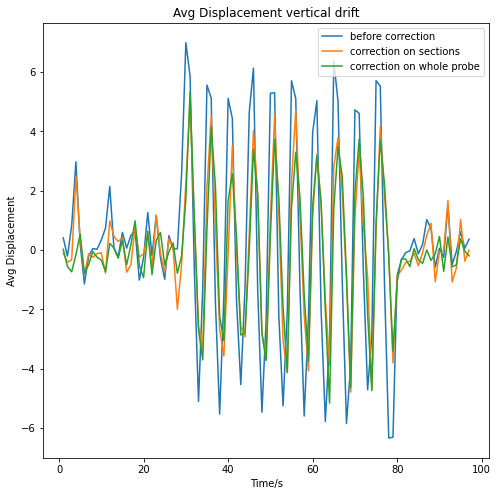

In [142]:
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames_wp)[1:], [cleaned_avg_disp_before_correction[t,t+1][1] for t in range(len(time_frames_wp)-1)])   #horizontal drift
plt.plot(np.array(time_frames)[1:], [cleaned_avg_disp[t,t+1][1] for t in range(len(time_frames)-1)])   #horizontal drift
plt.plot(np.array(time_frames_wp)[1:], [cleaned_avg_disp_wp[t,t+1][1] for t in range(len(time_frames_wp)-1)])   #vertical drift
plt.legend(['before correction','correction on sections', 'correction on whole probe'], loc = "upper right")
plt.title('Avg Displacement vertical drift')
plt.xlabel('Time/s')
plt.ylabel('Avg Displacement')
#plt.ylim((-2.5, 2.0))

Text(0, 0.5, 'Avg Displacement')

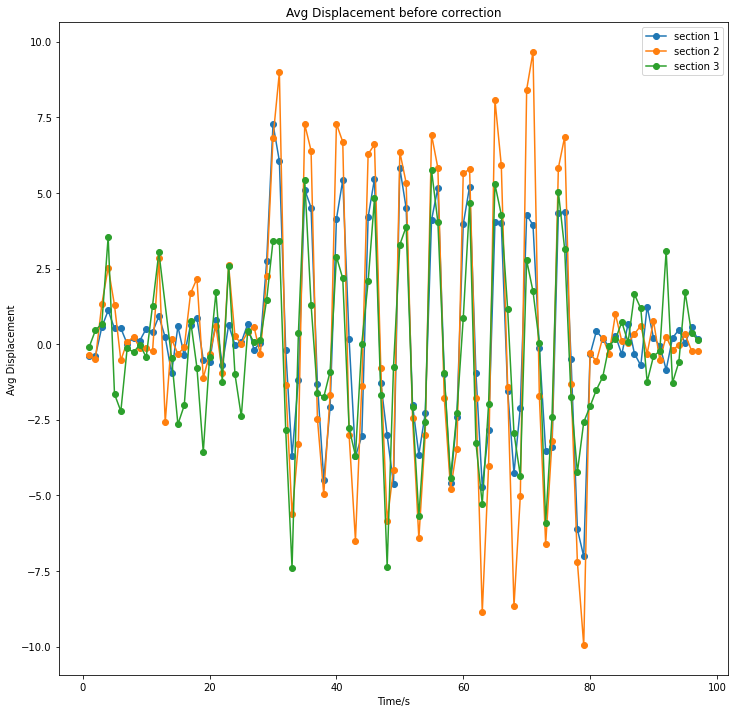

In [48]:
plt.figure(figsize=(12,12))
plt.plot(np.array(time_frames_section1)[1:], [cleaned_avg_disp_section1[t,t+1][1] for t in range(len(time_frames_section1)-1)],'o-')  
plt.plot(np.array(time_frames_section2)[1:], [cleaned_avg_disp_section2[t,t+1][1] for t in range(len(time_frames_section2)-1)],'o-')
plt.plot(np.array(time_frames_section3)[1:], [cleaned_avg_disp_section3[t,t+1][1] for t in range(len(time_frames_section3)-1)],'o-')
plt.legend(['section 1', 'section 2', 'section 3'], loc = "upper right")
plt.title('Avg Displacement before correction')
plt.xlabel('Time/s')
plt.ylabel('Avg Displacement')
#plt.ylim((-2.5, 2.0))

# Cumulative Disp

In [81]:
def cum_disp(ll_drifts):
    dt=20
    sf = 30000
    maxt = np.max(spike_time)/sf
    steps = np.arange(0,maxt*sf,dt*sf)
    cumulative_displacements = np.cumsum([np.mean(np.array(d), axis=0) for d in ll_drifts], axis=0)
    return cumulative_displacements

In [82]:
ll_of_disp_section3.append(ll_of_disp_section3[len(ll_of_disp_section3)-1])

In [83]:
cumulative_displacements_section1 = []
cumulative_displacements_section1 = np.array(cumulative_displacements_section1)
cumulative_displacements_section1 = cum_disp(ll_of_disp_section1) #cleaned

In [84]:
cumulative_displacements_section2 = []
cumulative_displacements_section2 = np.array(cumulative_displacements_section2)
cumulative_displacements_section2 = cum_disp(ll_of_disp_section2) #cleaned

In [85]:
cumulative_displacements_section3 = []
cumulative_displacements_section3 = np.array(cumulative_displacements_section3)
cumulative_displacements_section3 = cum_disp(ll_of_disp_section3) #cleaned

In [97]:
cumulative_displacements = []
cumulative_displacements = np.array(cumulative_displacements)
cumulative_displacements = cum_disp(ll_of_disp) #whole probe

In [64]:
cumulative_displacements_wp = []
cumulative_displacements_wp = np.array(cumulative_displacements_wp)
cumulative_displacements_wp = cum_disp(ll_of_disp_wp)

In [40]:
cumulative_displacements_before_correction = cumulative_displacements_wp

In [98]:
dist = []
for t in range(len(time_frames_wp)-1):
    dist.append(cumulative_displacements[t])
npdist = np.array(dist)
print(npdist.mean(axis=0))

[-0.1826216   2.40383863]


Text(0, 0.5, 'Cumulative displacement')

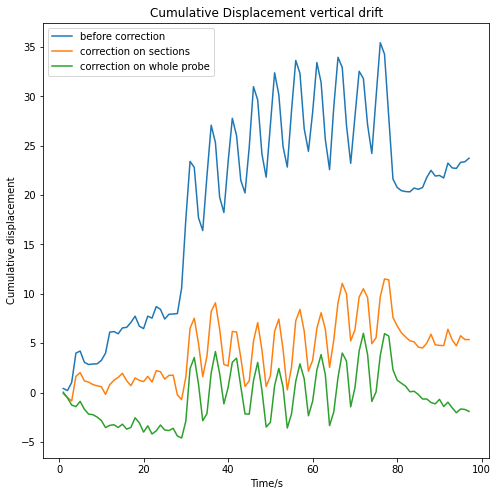

In [146]:
#cleaned data
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames_wp)[1:], [cumulative_displacements_before_correction[t][1] for t in range(len(time_frames_wp)-1)])
plt.plot(np.array(time_frames)[1:], [cumulative_displacements[t][1] for t in range(len(time_frames)-1)])   #horizontal drift
plt.plot(np.array(time_frames_wp)[1:], [cumulative_displacements_wp[t][1] for t in range(len(time_frames_wp)-1)])   #vertical drift
plt.legend(['before correction', 'correction on sections', 'correction on whole probe'], loc = "upper left")
plt.title('Cumulative Displacement vertical drift')
#plt.ylim((-5, 30))  #scaled
plt.xlabel('Time/s')
plt.ylabel('Cumulative displacement')

Text(0, 0.5, 'Cumulative displacement')

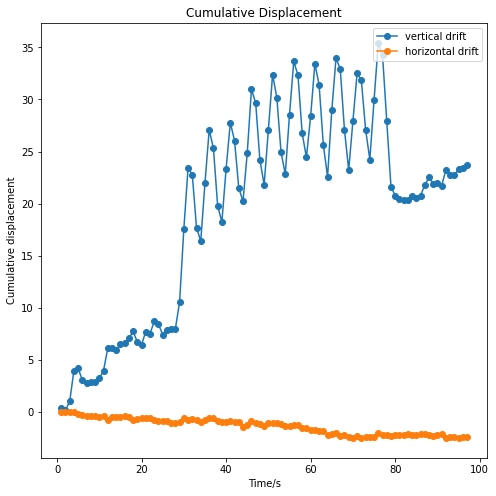

In [102]:
#cleaned data
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames_wp)[1:], [cumulative_displacements_wp[t][1] for t in range(len(time_frames_wp)-1)],'o-')   #horizontal drift
plt.plot(np.array(time_frames_wp)[1:], [cumulative_displacements_wp[t][0] for t in range(len(time_frames_wp)-1)],'o-')   #vertical drift
plt.legend(['vertical drift', 'horizontal drift'], loc = "upper right")
plt.title('Cumulative Displacement')
#plt.ylim((-5, 30))  #scaled
plt.xlabel('Time/s')
plt.ylabel('Cumulative displacement')

Text(0, 0.5, 'Cumulative displacement')

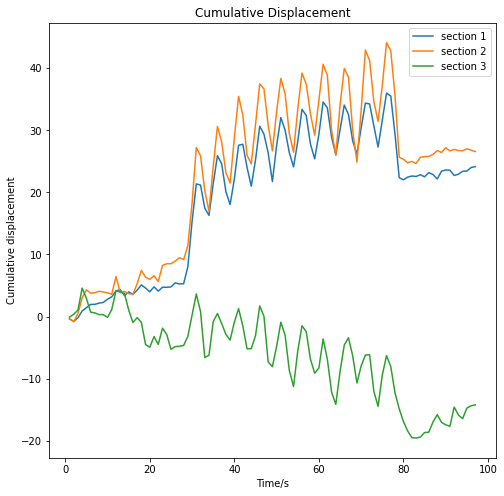

In [124]:
plt.figure(figsize=(8,8))
plt.plot(np.array(time_frames_section1)[1:], [cumulative_displacements_section1[t][1] for t in range(len(time_frames_section1)-1)],)
plt.plot(np.array(time_frames_section2)[1:], [cumulative_displacements_section2[t][1] for t in range(len(time_frames_section2)-1)],) 
plt.plot(np.array(time_frames_section3)[1:], [cumulative_displacements_section3[t][1] for t in range(len(time_frames_section3)-1)]) 
plt.legend(['section 1', 'section 2', 'section 3'], loc = "upper right")
plt.title('Cumulative Displacement')
#plt.ylim((-8, 20))  #scaled
plt.xlabel('Time/s')
plt.ylabel('Cumulative displacement')

In [20]:
plt.figure(figsize=(16,14))         
l_corrected_wp = np.copy(spike_loc)
dt = 20
steps = np.arange(0,int(maxt),dt)
for j,i in enumerate(steps):        
    t0=i*sf         
    t1= (i+dt)*sf  
    inds = np.where ((spike_time>=t0) & (spike_time<t1))[0]
    if j<len(time_frames_wp)-1:
        l_corrected_wp[0][inds] = l_corrected_wp[0][inds] - cleaned_avg_disp_wp[j, j+1][0]
        l_corrected_wp[1][inds] = l_corrected_wp[1][inds] - cleaned_avg_disp_wp[j, j+1][1]

<Figure size 1152x1008 with 0 Axes>

# Correction

In [86]:
def correction(cumulative_displacemets,y1,y2):
    dt=20
    sf = 30000
    l_corrected=[]
    maxt = np.max(spike_time)/sf
    steps = np.arange(0,maxt*sf,dt*sf)
    x = np.interp(np.arange(0,maxt*sf+1), steps[1:], np.array(cumulative_displacemets)[:,0])
    y = np.interp(np.arange(0,maxt*sf+1), steps[1:], np.array(cumulative_displacemets)[:,1])
    interpolated_drift = np.vstack((x,y))
    inds = np.where((spike_loc[1]<=y2) & (spike_loc[1]>=y1))[0]
    x_axis = spike_loc[1][inds]
    y_axis = spike_loc[0][inds]
    l_corrected.append(y_axis)
    l_corrected.append(x_axis)
    l_corrected[0] = l_corrected[0] - interpolated_drift[0][spike_time][inds]
    l_corrected[1] = l_corrected[1] - interpolated_drift[1][spike_time][inds]
    l_corrected = np.array(l_corrected)
    return l_corrected

In [87]:
l_corrected_section1 = correction(cumulative_displacements_section1, 0, section_len)
l_corrected_section2 = correction(cumulative_displacements_section2, section_len, 2*section_len)
l_corrected_section3 = correction(cumulative_displacements_section3, 2*section_len, 3*section_len)

In [88]:
correction_array = np.hstack((l_corrected_section1, l_corrected_section2, l_corrected_section3))
correction_array.shape, spike_loc.shape

((2, 973012), (2, 973012))

In [89]:
aligned_correction_array = np.zeros((2, len(correction_array[1])))
aligned_correction_array.shape

(2, 973012)

In [90]:
def align_spikes(l_corrected,y1,y2):
    inds = np.where((spike_loc[1]<=y2) & (spike_loc[1]>=y1))[0]
    aligned_correction_array[0][inds] = l_corrected[0]
    aligned_correction_array[1][inds] = l_corrected[1]

In [91]:
align_spikes(l_corrected_section1, 0 ,section_len)
align_spikes(l_corrected_section2, section_len ,2*section_len)
align_spikes(l_corrected_section3, 2*section_len ,3*section_len)

In [59]:
#whole data
dt=20
sf = 30000
l_corrected_wp=[]
maxt = np.max(spike_time)/sf
steps = np.arange(0,maxt*sf,dt*sf)
x = np.interp(np.arange(0,maxt*sf+1), steps[1:], np.array(cumulative_displacements_wp)[:,0])
y = np.interp(np.arange(0,maxt*sf+1), steps[1:], np.array(cumulative_displacements_wp)[:,1])
interpolated_drift = np.vstack((x,y))
l_corrected_wp = np.copy(spike_loc)
l_corrected_wp[0] = l_corrected_wp[0] - interpolated_drift[0][spike_time]
l_corrected_wp[1] = l_corrected_wp[1] - interpolated_drift[1][spike_time]

# Reclustering

In [92]:
def cluster_corrected(l_corrected):
    plt.figure(figsize=(16,14))
    ms = MeanShift(bandwidth=6.5, bin_seeding=True, min_bin_freq=6)

    cluster_centers_tf= []
    time_frames = []
    dt = 20
    steps = np.arange(0,int(maxt),dt)
    for j,i in enumerate(steps):
        t0=i*sf      #i*30k for every step
        t1=(i+dt)*sf  #take value of the next time step

        inds = np.where ((spike_time>=t0) & (spike_time<t1))[0]
        X_clust = np.vstack((l_corrected[0,inds], l_corrected[1,inds]))
        if len(X_clust[1]) >6:
            #clustering
            ms.fit(X_clust.T)
            labels = ms.labels_
            cluster_centers = ms.cluster_centers_
            n_clusters = len(np.unique(labels))
            print('Number of clusters for time interval %d: %d' %(j, n_clusters))
            cluster_centers_tf.append(cluster_centers)
            time_frames.append(j)
            if i%10==0:     #for each time stamp
                ax = plt.subplot(len(steps),1,j+1)     #nrows, nrcols, plot_no
                y = X_clust[0][:]
                x = X_clust[1][:]

                ax.scatter(x,y, s=2, alpha=0.1, c='k')
                ax.scatter(cluster_centers[:,1], cluster_centers[:,0], marker="x", color='r', s=30, linewidths=2)
                plt.ylabel('{:d}s'.format(int(t0/sf)))

                #plt.xlim((40,350))        #Get or set the x limits of the current axes
                plt.ylim((0,40))
                plt.xticks(())
    return cluster_centers_tf,time_frames

Number of clusters for time interval 0: 72
Number of clusters for time interval 1: 72
Number of clusters for time interval 2: 67
Number of clusters for time interval 3: 78
Number of clusters for time interval 4: 81
Number of clusters for time interval 5: 86
Number of clusters for time interval 6: 75
Number of clusters for time interval 7: 78
Number of clusters for time interval 8: 77
Number of clusters for time interval 9: 79
Number of clusters for time interval 10: 84
Number of clusters for time interval 11: 79
Number of clusters for time interval 12: 69
Number of clusters for time interval 13: 36
Number of clusters for time interval 14: 39
Number of clusters for time interval 15: 41
Number of clusters for time interval 16: 49
Number of clusters for time interval 17: 56
Number of clusters for time interval 18: 57
Number of clusters for time interval 19: 59
Number of clusters for time interval 20: 55
Number of clusters for time interval 21: 56
Number of clusters for time interval 22: 6

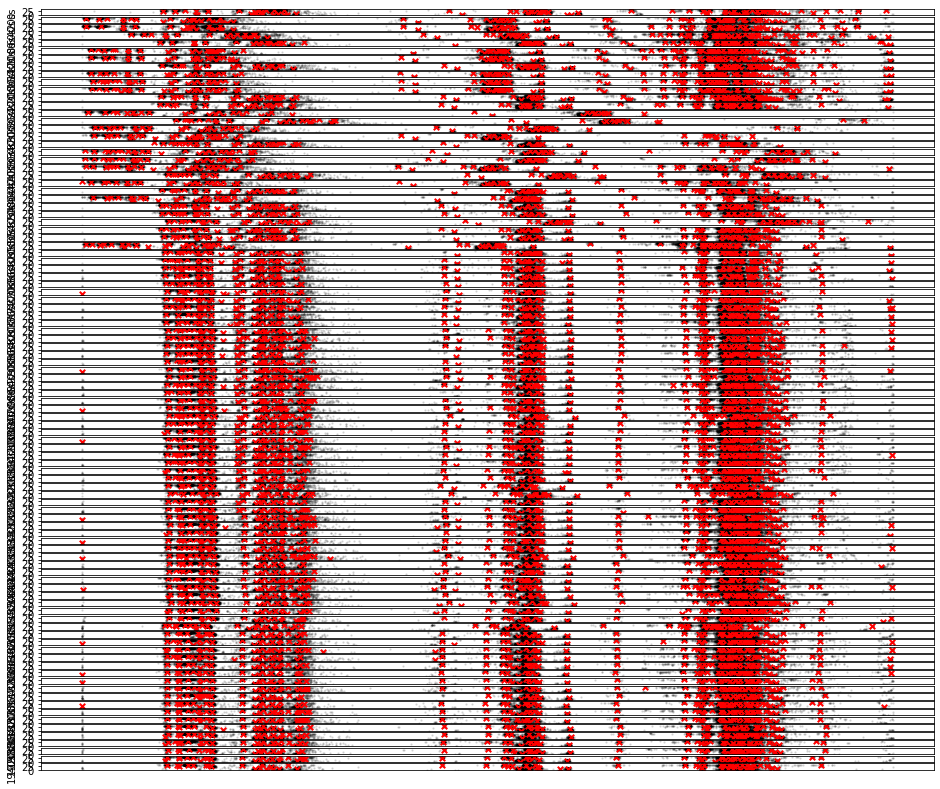

In [93]:
cluster_centers_tf, time_frames = cluster_corrected(aligned_correction_array)

Number of clusters for time interval 0: 71
Number of reliable clusters for time interval 0: 56
Number of clusters for time interval 1: 73
Number of reliable clusters for time interval 1: 67
Number of clusters for time interval 2: 66
Number of reliable clusters for time interval 2: 56
Number of clusters for time interval 3: 79
Number of reliable clusters for time interval 3: 67
Number of clusters for time interval 4: 80
Number of reliable clusters for time interval 4: 71
Number of clusters for time interval 5: 79
Number of reliable clusters for time interval 5: 69
Number of clusters for time interval 6: 74
Number of reliable clusters for time interval 6: 68
Number of clusters for time interval 7: 77
Number of reliable clusters for time interval 7: 68
Number of clusters for time interval 8: 80
Number of reliable clusters for time interval 8: 70
Number of clusters for time interval 9: 76
Number of reliable clusters for time interval 9: 68
Number of clusters for time interval 10: 87
Number

Number of clusters for time interval 85: 58
Number of reliable clusters for time interval 85: 54
Number of clusters for time interval 86: 65
Number of reliable clusters for time interval 86: 61
Number of clusters for time interval 87: 73
Number of reliable clusters for time interval 87: 68
Number of clusters for time interval 88: 57
Number of reliable clusters for time interval 88: 49
Number of clusters for time interval 89: 62
Number of reliable clusters for time interval 89: 57
Number of clusters for time interval 90: 69
Number of reliable clusters for time interval 90: 62
Number of clusters for time interval 91: 66
Number of reliable clusters for time interval 91: 58
Number of clusters for time interval 92: 60
Number of reliable clusters for time interval 92: 54
Number of clusters for time interval 93: 64
Number of reliable clusters for time interval 93: 57
Number of clusters for time interval 94: 66
Number of reliable clusters for time interval 94: 60
Number of clusters for time in

([<matplotlib.axis.XTick at 0x7f5053d1d9b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

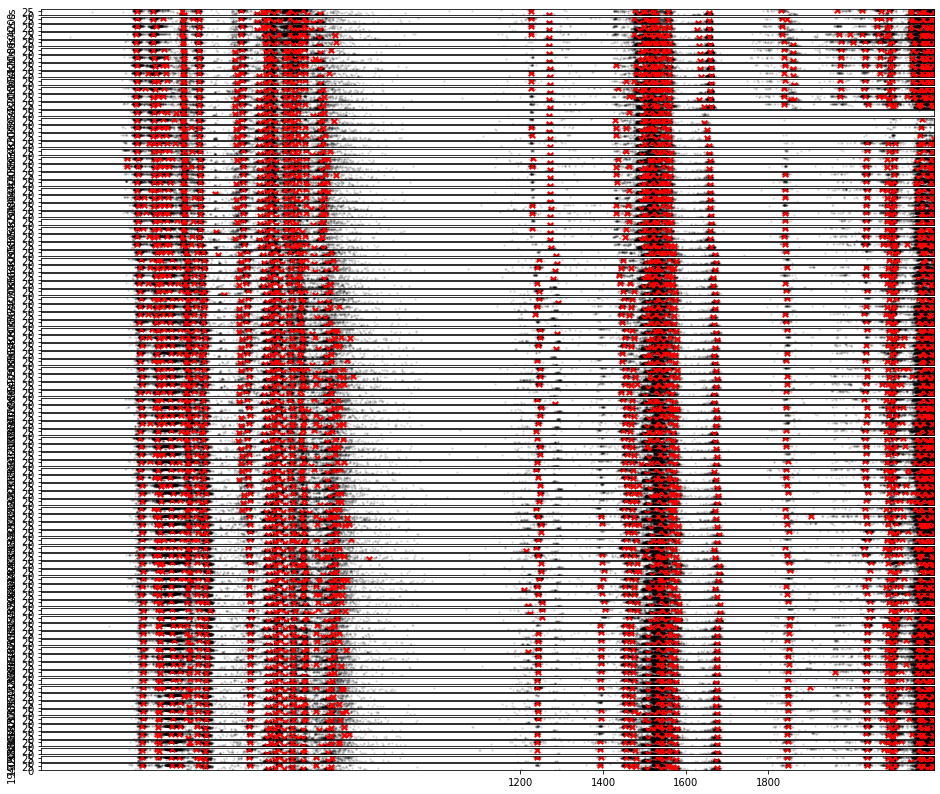

In [60]:
plt.figure(figsize=(16,14))
ms = MeanShift(bandwidth=6.5, bin_seeding=True, min_bin_freq=6)

cluster_centers_tf_wp= []
time_frames_wp = []
dt = 20
steps = np.arange(0,int(maxt),dt)
for j,i in enumerate(steps):
    t0=i*sf      #i*30k for every step
    t1=(i+dt)*sf  #take value of the next time step
    count = 0
    inds = np.where ((spike_time>=t0) & (spike_time<t1))[0]# & (spike_loc[1]<1800) & (spike_loc[1]>1200)
    X_clust = np.vstack((l_corrected_wp[0,inds], l_corrected_wp[1,inds]))
    #clustering
    ms.fit(X_clust.T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    cc = []
    n_clusters = len(np.unique(labels))
    for k in range(len(np.unique(labels,return_counts=True)[1])):
        if np.unique(labels,return_counts=True)[1][k] > 30:
            cc.append(cluster_centers[k])
            count +=1
    print('Number of clusters for time interval %d: %d' %(j, n_clusters))
    print('Number of reliable clusters for time interval %d: %d' %(j, count))
    cc = np.array(cc)
    cluster_centers_tf_wp.append(cc)
    time_frames_wp.append(j)
    if i%10==0:     #for each time stamp
        ax = plt.subplot(len(steps),1,j+1)     #nrows, nrcols, plot_no
        y = X_clust[0][:]
        x = X_clust[1][:]
        
        ax.scatter(x,y, s=2, alpha=0.1, c='k')
        #ax.scatter(cluster_centers[:,1], cluster_centers[:,0], marker="x", color='r', s=30, linewidths=2)
        ax.scatter(cc[:,1], cc[:,0], marker="x", color='r', s=30, linewidths=2)
        
        plt.ylabel('{:d}s'.format(int(t0/sf)))
        plt.ylabel('{:d}s'.format(int(t0/sf)))
    
        plt.xlim((40,2200))        #Get or set the x limits of the current axes
        plt.ylim((0,40))
        plt.xticks(())
plt.xticks((1200,1400,1600,1800))   